# **TEXT EMOTION DETECTION**
---





**Team Members:**

Hamna Mohiuddin - 21B-189-SE

Wareesha Ali - 21B-088-SE

Syed Owais Ali Shah - 21B-052-SE

# **IMPORTING NECESSARY LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**DATAFRAME FORMATION**

In [2]:
df=pd.read_csv("ml2.csv")

# **DATA EXPLORATION AND PREPROCESSING**

**Head() Function is used to print a few values of the dataset to understand it.**

In [3]:
print(df.head(10))

   wid      hmid reflection_period  \
0    1  45905549                3m   
1    2  45905550               24h   
2    3  45905551               24h   
3    4  45905552               24h   
4    5  45905553               24h   
5    6  45905554               24h   
6    7  45905555               24h   
7    8  45905556                3m   
8    9  45905557               24h   
9   10  45905558               24h   

                                         original_hm  \
0  I got to spend the day with my niece that i ha...   
1  My wife and i are celebrating our ten year ann...   
2  My wife cooked me a surprise dinner to take to...   
3  My mom cooked dinner for us all and it was del...   
4  On my way to work i got hit on by a complete s...   
5  My mother in-law came to visit us before her t...   
6  I bought my son a gift from the MTA store and ...   
7  My fiance proposed to me in front of my family...   
8  i was able to make it home in time to put my s...   
9  I just got the new

**No# of Rows and Columns in the dataset.**

In [4]:
import pandas as pd
num_rows, num_columns = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 117781
Number of columns: 14


**Names of all the columns.**

In [5]:
import pandas as pd
column_names = df.columns

print("Column names:")
print(column_names)


Column names:
Index(['wid', 'hmid', 'reflection_period', 'original_hm', 'cleaned_hm',
       'modified', 'num_sentence', 'ground_truth_category',
       'predicted_category', 'age', 'country', 'gender', 'marital',
       'parenthood'],
      dtype='object')


**Describe() is used here to find the statistics of the dataset.**

In [6]:
summary_statistics = df.describe()
print(summary_statistics)

                 wid          hmid   num_sentence
count  117781.000000  1.177810e+05  117048.000000
mean    58891.000000  4.596444e+07       1.292692
std     34000.590365  3.400059e+04       1.208018
min         1.000000  4.590555e+07       1.000000
25%     29446.000000  4.593499e+07       1.000000
50%     58891.000000  4.596444e+07       1.000000
75%     88336.000000  4.599388e+07       1.000000
max    117781.000000  4.602333e+07      69.000000


**Duplicated is used on the dataset to find if there is any duplicated value in the dataset record.**

In [7]:
print(df.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
117776    False
117777    False
117778    False
117779    False
117780    False
Length: 117781, dtype: bool


**Below isnull().sum() is showing if there is any null  value in any of the columns.**

In [8]:
print(df.isnull().sum())

wid                          0
hmid                         0
reflection_period            0
original_hm                  1
cleaned_hm                   2
modified                     0
num_sentence               733
ground_truth_category    86411
predicted_category           1
age                        307
country                    203
gender                       0
marital                    155
parenthood                  78
dtype: int64


**dropna() is removing all the null values in the dataset.**

In [9]:
df_cleaned = df.dropna()

print(df_cleaned.head())

    wid      hmid reflection_period  \
7     8  45905556                3m   
17   18  45905566                3m   
35   36  45905584               24h   
37   38  45905586               24h   
42   43  45905591                3m   

                                          original_hm  \
7   My fiance proposed to me in front of my family...   
17       my son had a great time on his 8th birthday.   
35  I got to take the day off from my part time jo...   
37     I made another $42 dollars yesterday on mturk.   
42  I got to have a three day weekend which i spen...   

                                           cleaned_hm  modified  num_sentence  \
7   My fiance proposed to me in front of my family...      True           1.0   
17       my son had a great time on his 8th birthday.      True           1.0   
35  I got to take the day off from my part time jo...      True           1.0   
37     I made another $42 dollars yesterday on mturk.      True           1.0   
42  I got to have

**Duplicates is checking if there is any duplicated record in the dataset.**

In [10]:
df_no_duplicates = df.drop_duplicates(subset=['wid', 'hmid', 'reflection_period', 'original_hm', 'cleaned_hm',
       'modified', 'num_sentence', 'ground_truth_category',
       'predicted_category', 'age', 'country', 'gender', 'marital',
       'parenthood'])

print(df_no_duplicates.head())

   wid      hmid reflection_period  \
0    1  45905549                3m   
1    2  45905550               24h   
2    3  45905551               24h   
3    4  45905552               24h   
4    5  45905553               24h   

                                         original_hm  \
0  I got to spend the day with my niece that i ha...   
1  My wife and i are celebrating our ten year ann...   
2  My wife cooked me a surprise dinner to take to...   
3  My mom cooked dinner for us all and it was del...   
4  On my way to work i got hit on by a complete s...   

                                          cleaned_hm  modified  num_sentence  \
0  I got to spend the day with my niece that i ha...      True           1.0   
1  My wife and i are celebrating our ten year ann...      True           1.0   
2  My wife cooked me a surprise dinner to take to...      True           1.0   
3  My mom cooked dinner for us all and it was del...      True           1.0   
4  On my way to work i got hit on 

**Forward Fill is used to handle the null values with the values placed before it.**

In [11]:
df.fillna(method="ffill",inplace=True)
df

C:\Users\HP\AppData\Local\Temp\ipykernel_16320\2729279820.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill",inplace=True)


,wid,hmid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,age,country,gender,marital,parenthood
0,1,45905549,3m,I got to spend the day with my niece that i ha...,I got to spend the day with my niece that i ha...,True,1.0,NaN,affection,37,USA,m,married,y
1,2,45905550,24h,My wife and i are celebrating our ten year ann...,My wife and i are celebrating our ten year ann...,True,1.0,NaN,affection,37,USA,m,married,y
2,3,45905551,24h,My wife cooked me a surprise dinner to take to...,My wife cooked me a surprise dinner to take to...,True,1.0,NaN,affection,37,USA,m,married,y
3,4,45905552,24h,My mom cooked dinner for us all and it was del...,My mom cooked dinner for us all and it was del...,True,1.0,NaN,affection,37,USA,m,married,y
4,5,45905553,24h,On my way to work i got hit on by a complete s...,On my way to work i got hit on by a complete s...,True,1.0,NaN,enjoy_the_moment,37,USA,m,married,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117776,117777,46023325,24h,This issue worried me rather than saddening me...,This issue worried me rather than saddening me...,True,1.0,sad,sad,29,IND,f,married,y
117777,117778,46023326,24h,I lied to one of my best friends.,I lied to one of my best friends.,True,1.0,guilt,guilt,29,IND,f,married,y
117778,117779,46023327,24h,Two years back someone invited me to be the tu...,Two years back someone invited me to be the tu...,True,1.0,anger,anger,29,IND,f,married,y
117779,117780,46023328,24h,I had taken the responsibility to do something...,I had taken the responsibility to do something...,True,1.0,sad,sad,29,IND,f,married,y


# **DATA VISUALIZATION**

**Bar Graph here is showing the how frequently all the emotions occured.**

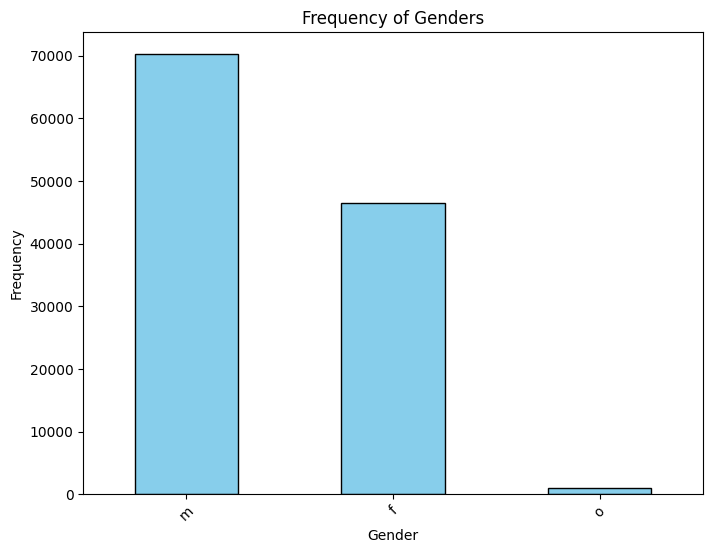

In [13]:
category_counts = df['gender'].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Frequency of Genders')
plt.xticks(rotation=45)
plt.show()

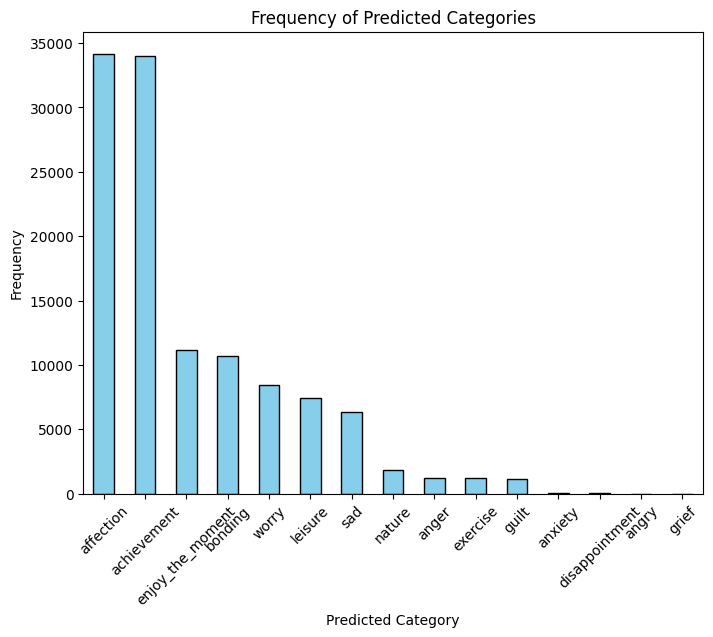

In [13]:
category_counts = df['predicted_category'].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Predicted Category')
plt.ylabel('Frequency')
plt.title('Frequency of Predicted Categories')
plt.xticks(rotation=45)
plt.show()

**Pie Chart is showing the proportions all the sentiments carry in the dataset.**

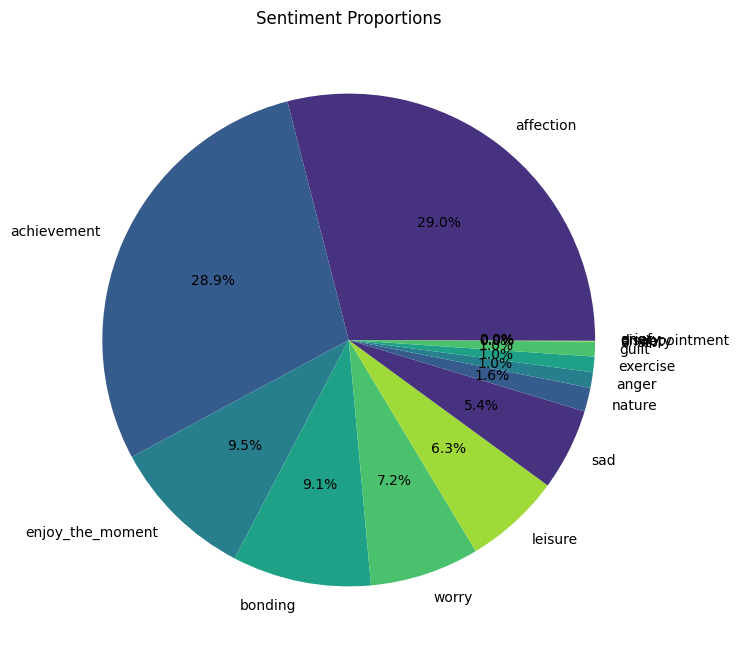

In [14]:
import matplotlib.pyplot as plt

sentiment_counts = df['predicted_category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Sentiment Proportions')
plt.show()


**Bar Graph here is showing the text length in each emotion.**

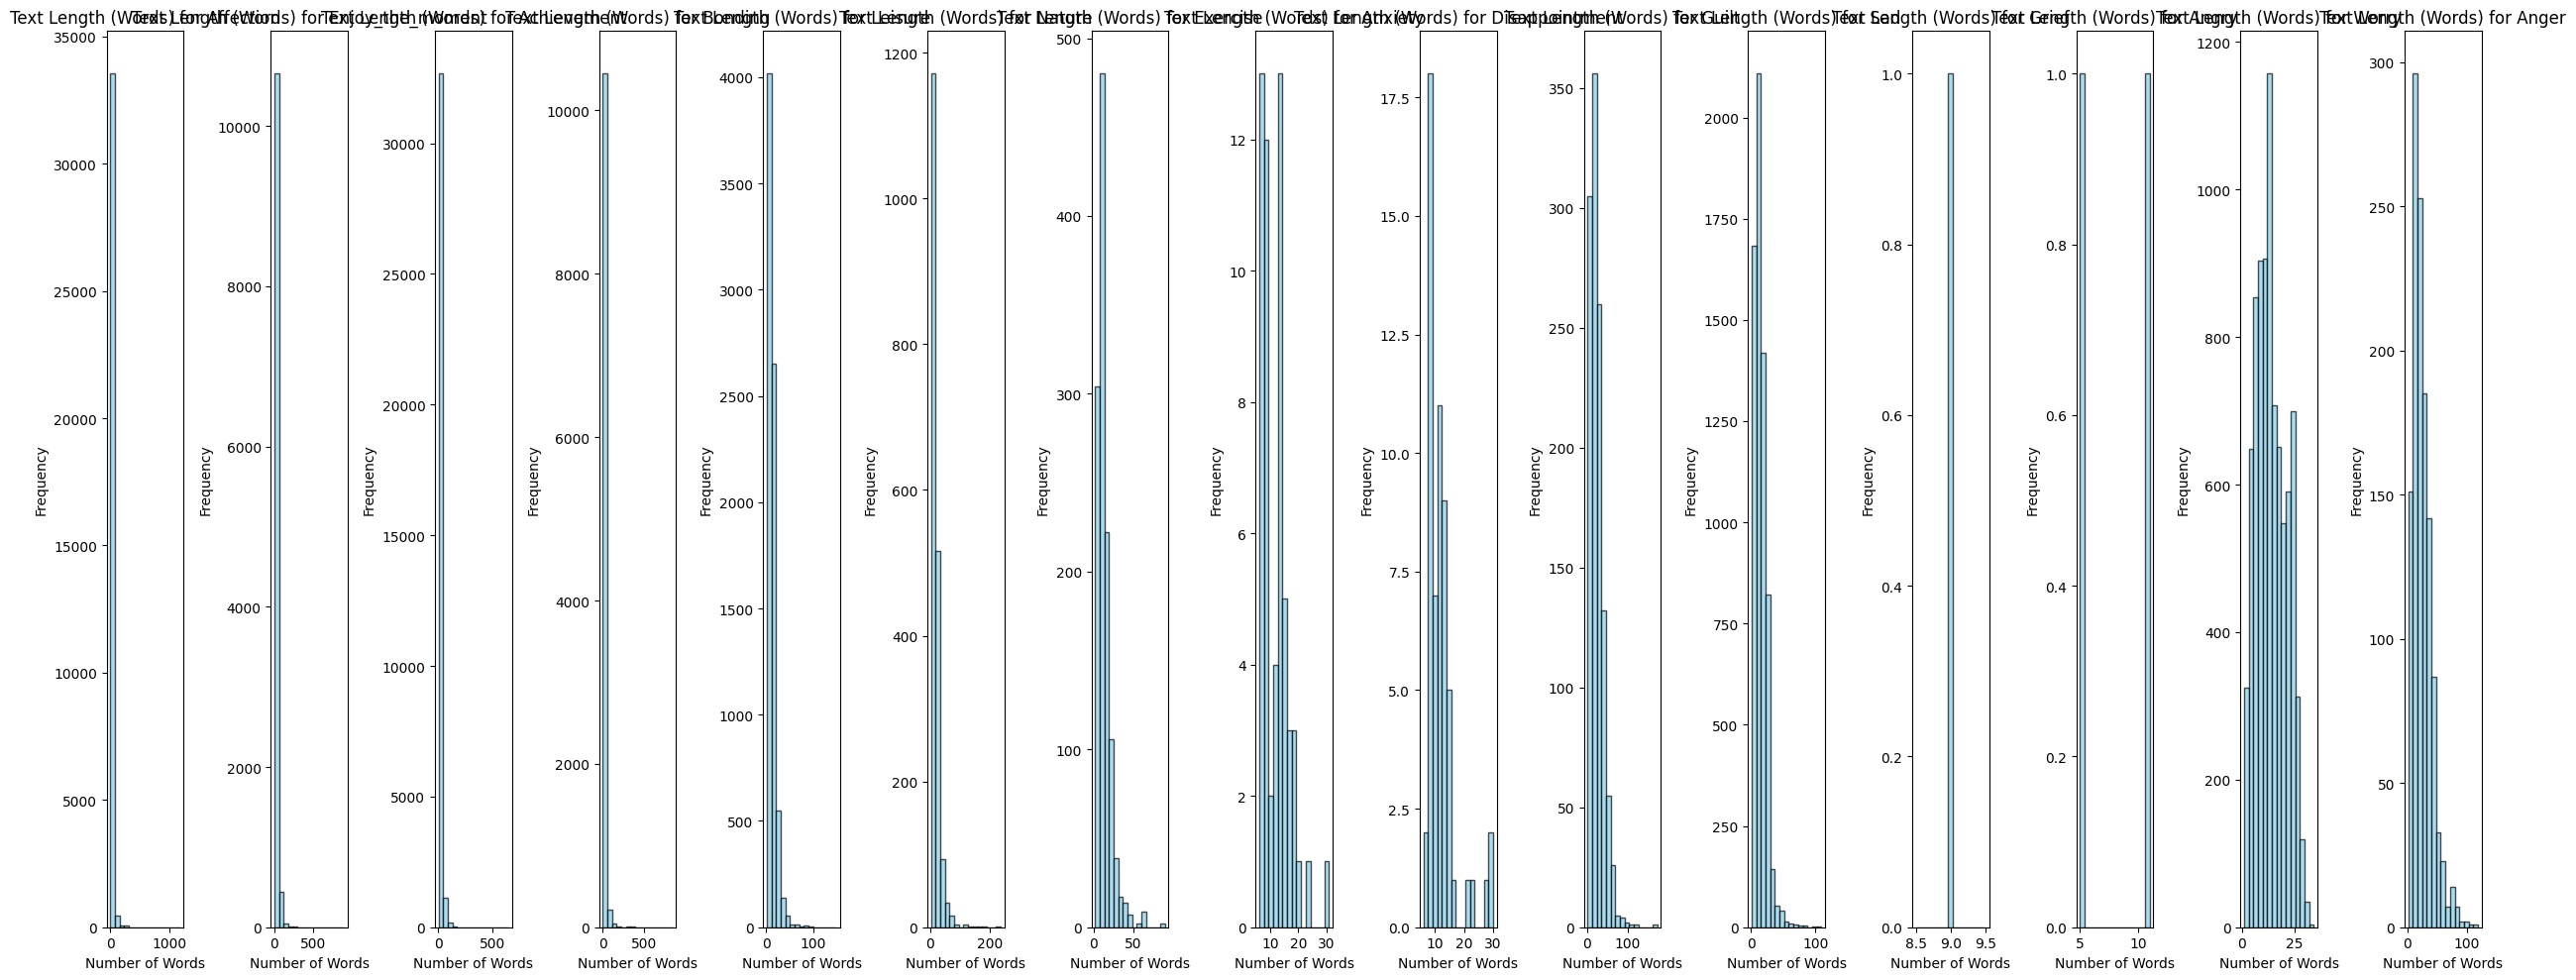

In [15]:
df['text_length_words'] = df['original_hm'].apply(lambda x: len(x.split()))
df['text_length_characters'] = df['original_hm'].apply(lambda x: len(x))

unique_categories = df['predicted_category'].unique()

num_subplots = len(unique_categories)

fig, axes = plt.subplots(1, num_subplots, figsize=(25, 10))

for i, category in enumerate(unique_categories):
    data_category = df[df['predicted_category'] == category]
    axes[i].hist(data_category['text_length_words'], bins=15, color='skyblue', alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Text Length (Words) for {category.capitalize()}')
    axes[i].set_xlabel('Number of Words')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**Bar Graph here is showing how frequently some words occur in each emotion.**

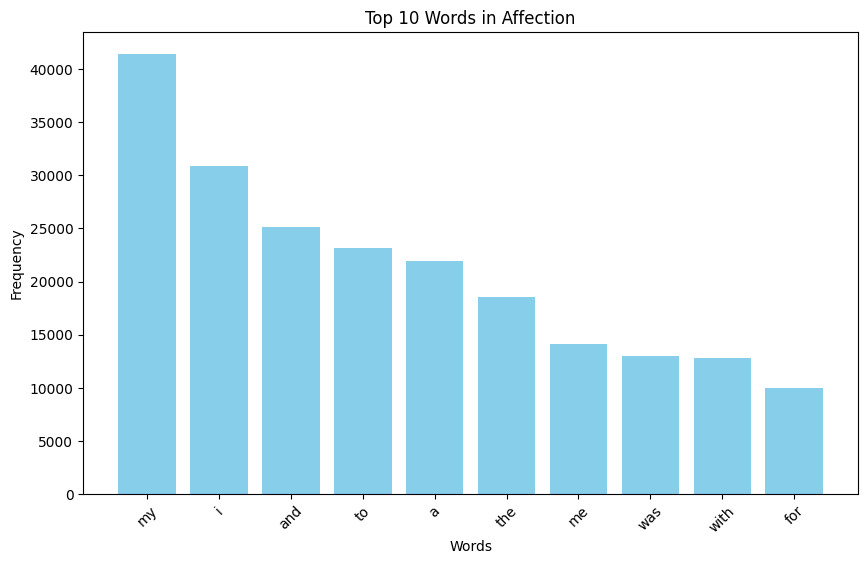

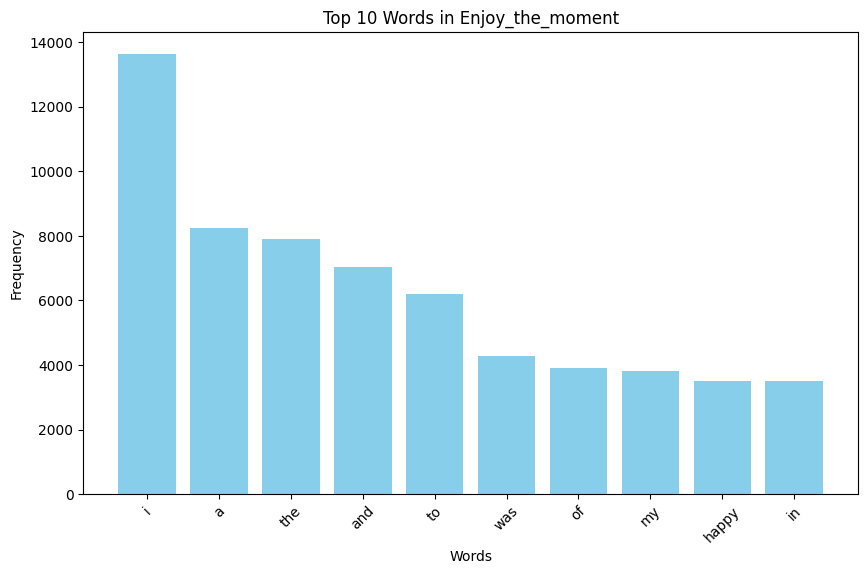

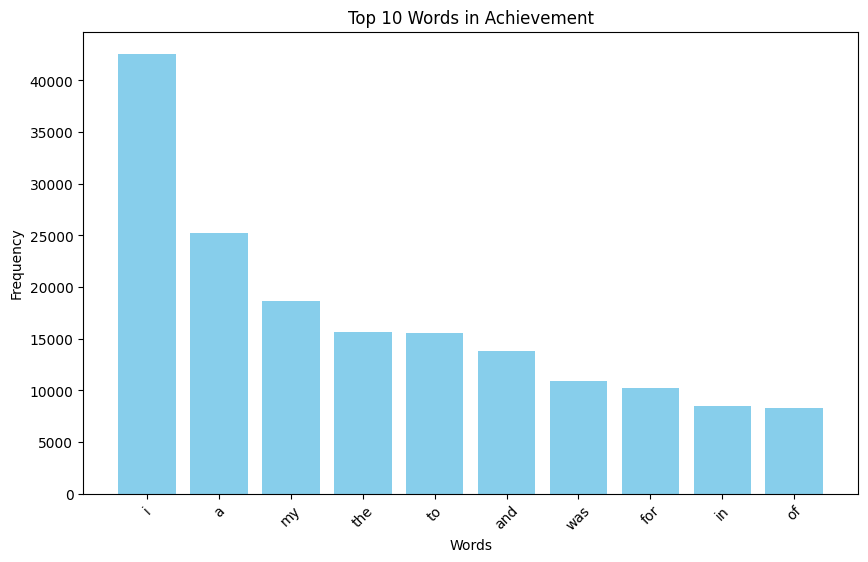

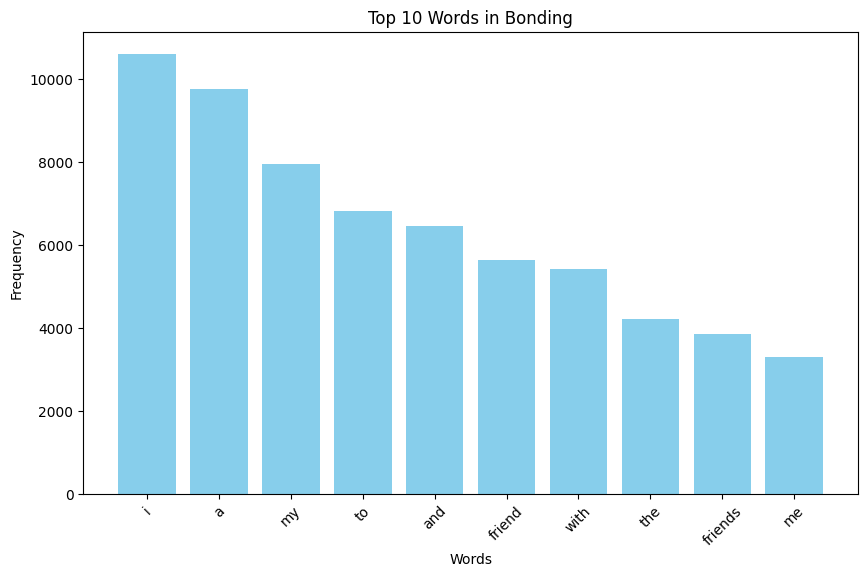

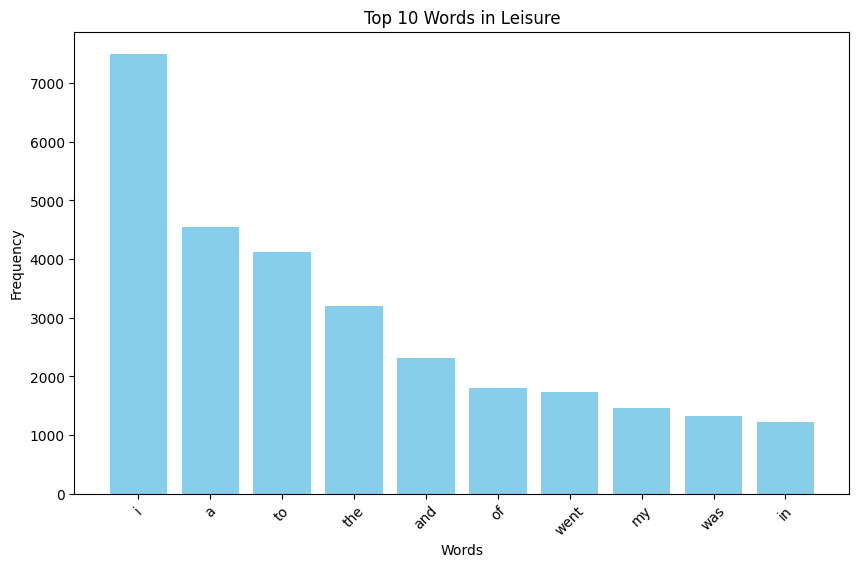

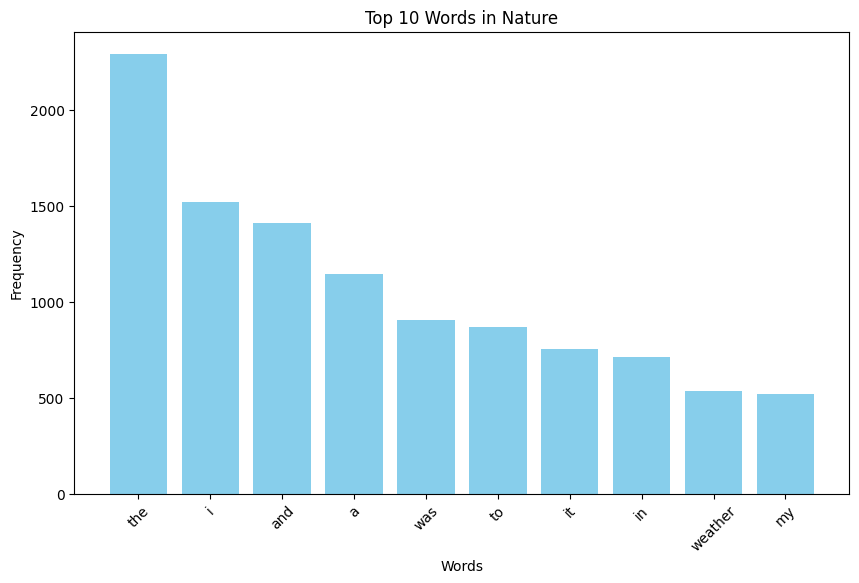

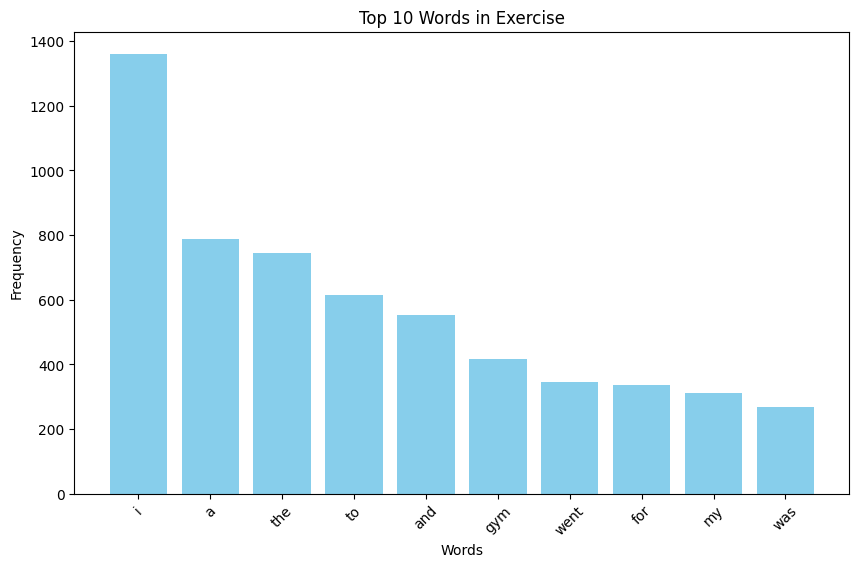

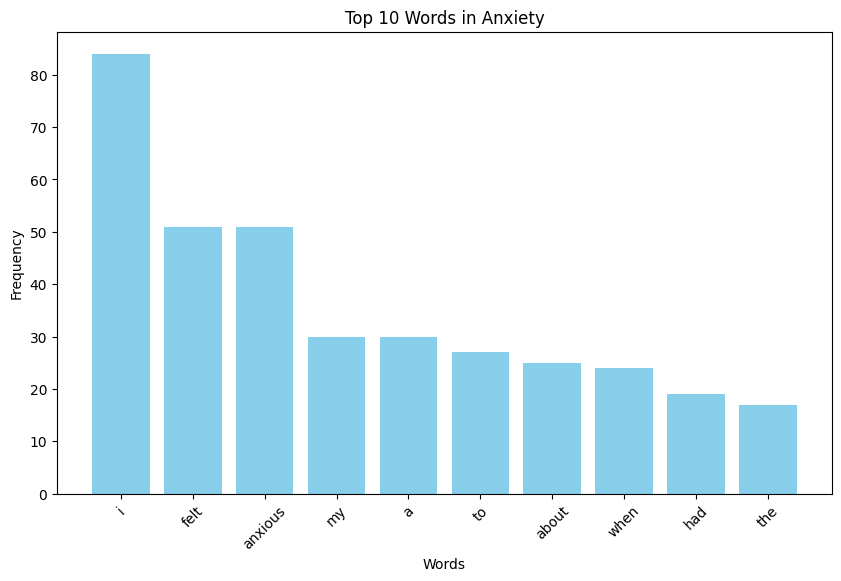

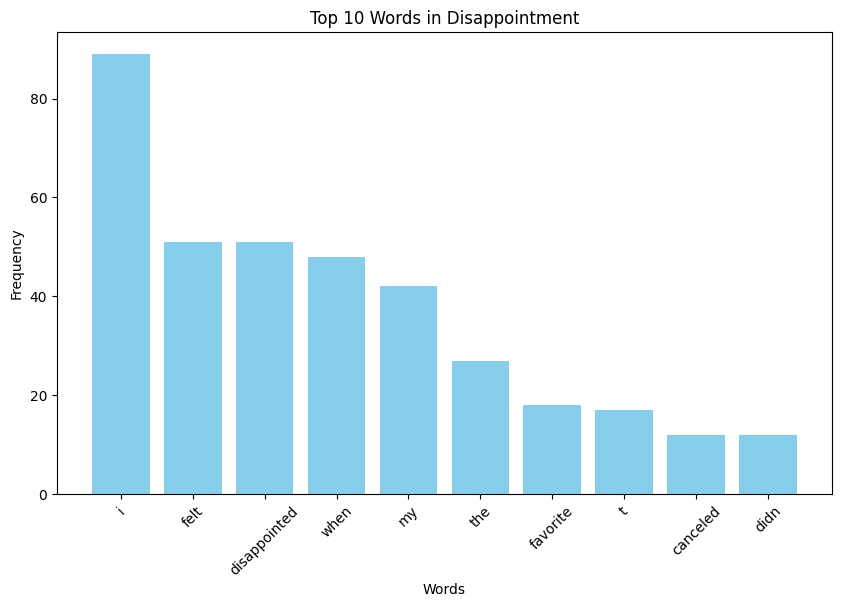

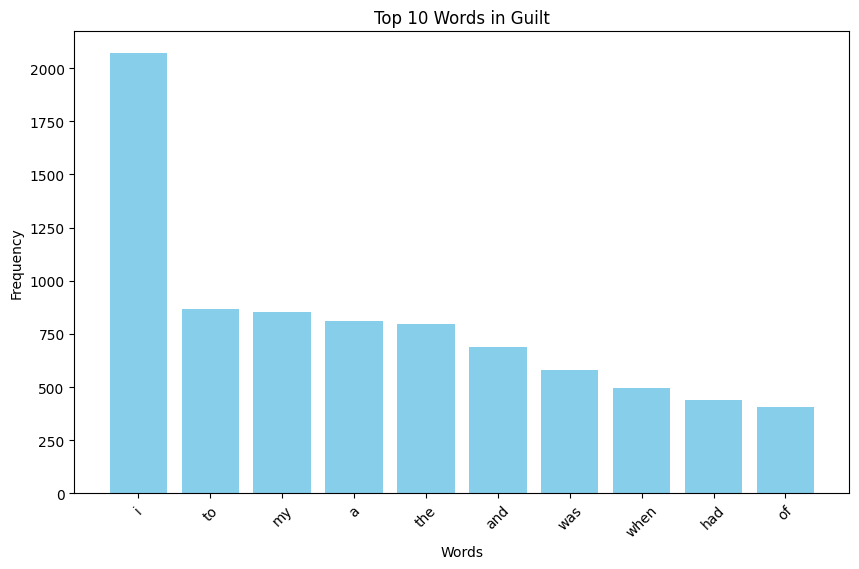

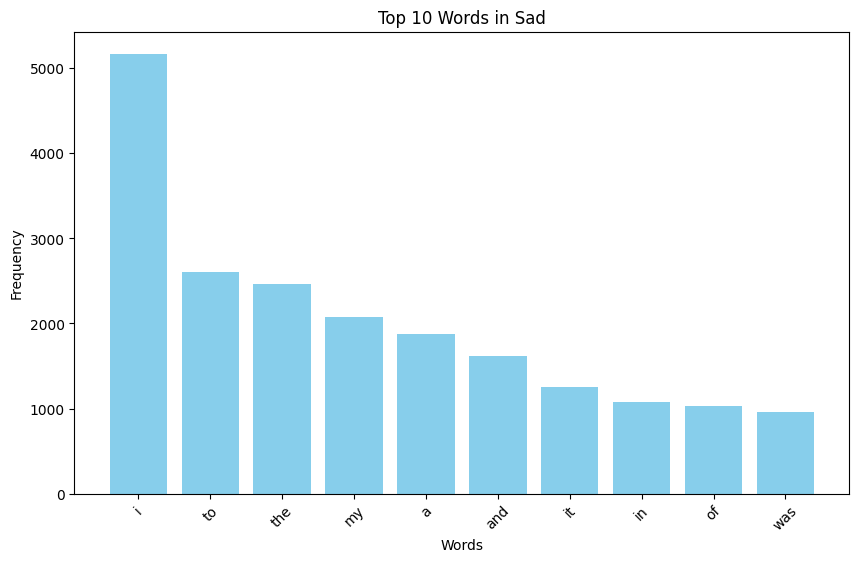

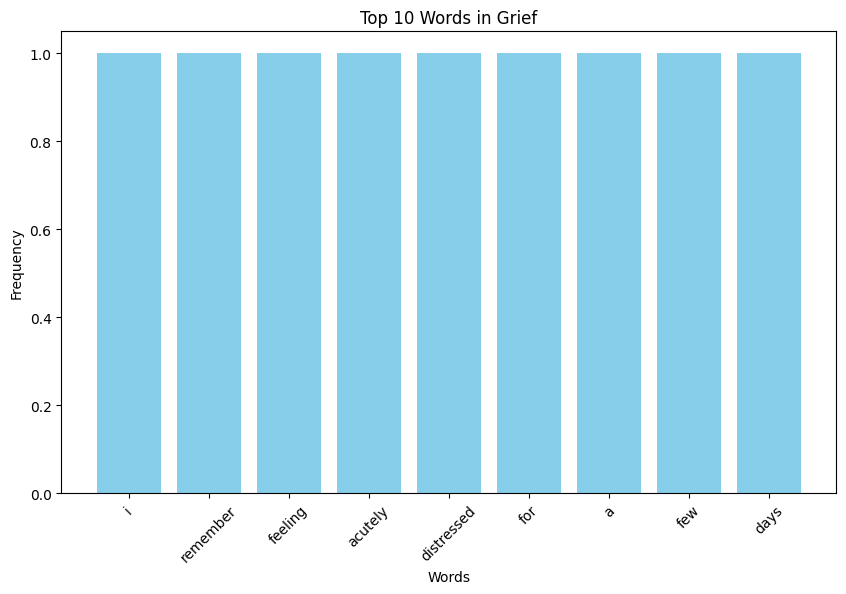

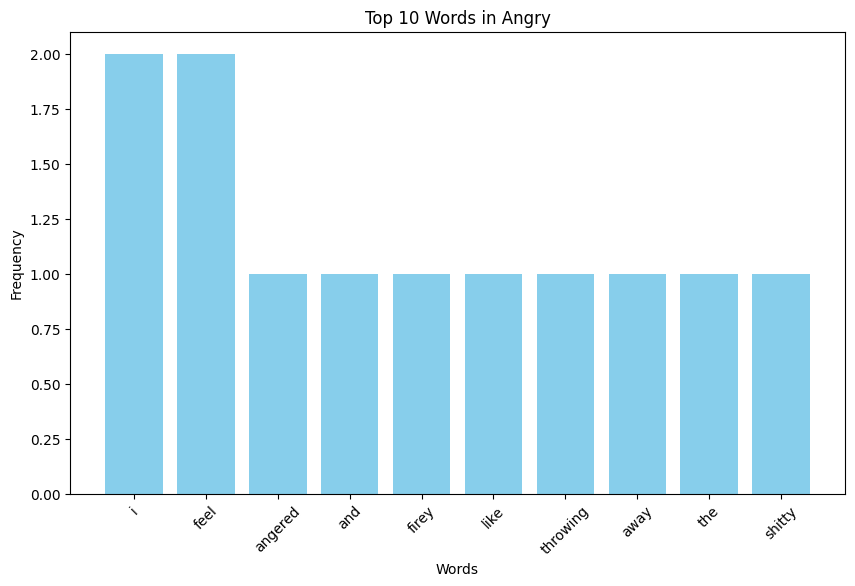

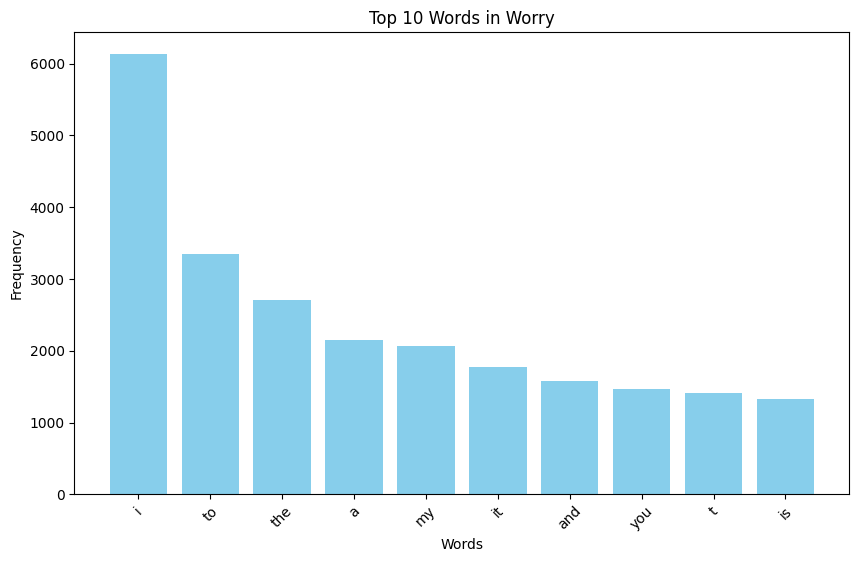

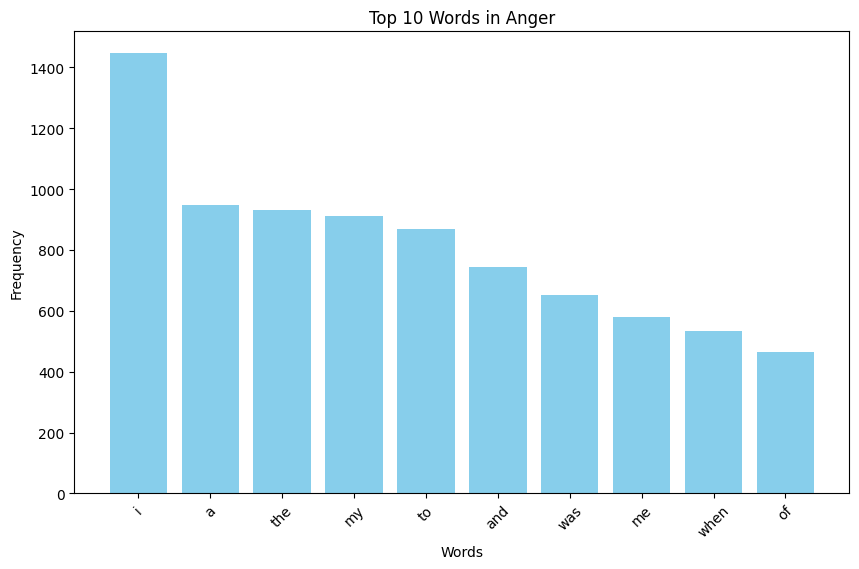

In [16]:
from collections import Counter
import re

def count_words_in_category(df, category):
    texts = df[df['predicted_category'] == category]['original_hm']
    all_text = " ".join(texts)
    words = re.findall(r'\b\w+\b', all_text.lower())
    return Counter(words)

def plot_word_frequency(df):
    categories = df['predicted_category'].unique()
    for category in categories:
        word_counts = count_words_in_category(df, category)
        common_words = word_counts.most_common(10)
        df_common_words = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
        plt.figure(figsize=(10, 6))
        plt.bar(df_common_words['Word'], df_common_words['Frequency'], color='skyblue')
        plt.xlabel('Words')
        plt.ylabel('Frequency')
        plt.title(f'Top 10 Words in {category.capitalize()}')
        plt.xticks(rotation=45)
        plt.show()

plot_word_frequency(df)

In [17]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


**VaderSentiment is a library that calculates the sentiment score of text. Here VaderSentiment is used to calculate score and then find out correlation between all the columns.**

Correlation Matrix:
wid                      -0.220553
hmid                     -0.220553
num_sentence              0.228191
text_length_words         0.257098
text_length_characters    0.249701
compound_sentiment        1.000000
Name: compound_sentiment, dtype: float64


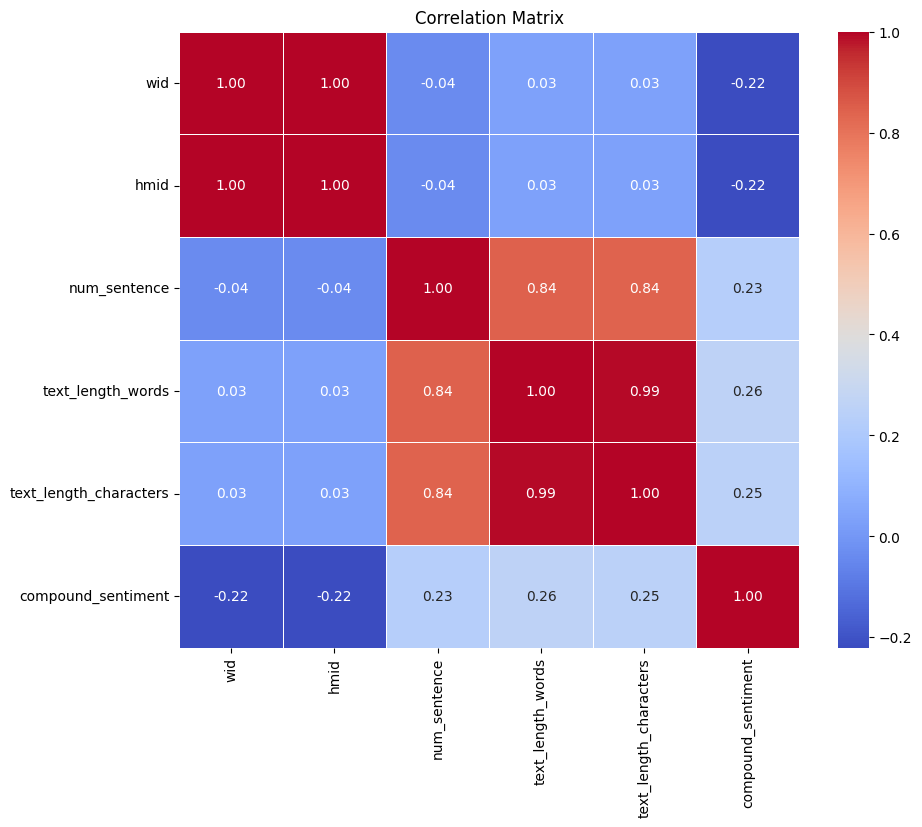

In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_scores(text):
    return analyzer.polarity_scores(text)['compound']

df['compound_sentiment'] = df['cleaned_hm'].apply(get_sentiment_scores)

numeric_df = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_df.corr()

print("Correlation Matrix:")
print(correlation_matrix['compound_sentiment'])

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [20]:
!pip install neattext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 3.1 MB/s eta 0:00:00


**Neattext library helps in cleaning the data. Here it is used to remove usernames from the text.**

In [21]:
import neattext.functions as nfx

# Remove the user handles
df['cleaned_hm'] = df['cleaned_hm'].apply(nfx.remove_userhandles)

In [ ]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

**Here stopwords like 'is', 'am', 'are', etc. are removed from the data since they contain no significant information.**

In [22]:
# Remove the stopwords
df['cleaned_hm'] = df['cleaned_hm'].apply(nfx.remove_stopwords)

**Breaking the dataset into Features and Target. Where x is feature and y is target.**

In [23]:
x = df['cleaned_hm']
y = df['predicted_category']

**Train Test Split is used here to breakdown dataset into training data and testing data.**

In [24]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# **MODEL APPLICATION**


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

**Logistic Regression is used here since the data is textual and classification based. Logistic Regression works well with Multi-class classification and sparse data. Moreover, it also helps in avoiding overfitting.**

In [27]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8272534314419131

**Another model, SVM is used here since  it can handle high-dimensional data, is effective in cases with limited training samples.**

In [26]:
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svc', SVC(kernel = 'rbf', C = 10))])
pipe_svm.fit(x_train,y_train)
pipe_svm.score(x_test,y_test)

0.812565445026178

**Random Forest Classifier also avoid overfitting, and takes decision by creating multiple trees and their average. It is also computationally efficient and less time consuming.**

In [28]:
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf', RandomForestClassifier(n_estimators=10))])
pipe_rf.fit(x_train,y_train)
pipe_rf.score(x_test,y_test)

0.7400594311589076

# **Accuracy Report**

In [31]:
rf_pred = pipe_rf.predict(x_test)
lr_pred = pipe_lr.predict(x_test)
svm_pred = pipe_svm.predict(x_test)
# Logistic Regression metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Precision:", precision_score(y_test, lr_pred, average='weighted'))
print("Recall:", recall_score(y_test, lr_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, lr_pred, average='weighted'))
print(classification_report(y_test, lr_pred))

# SVM metrics
print("\nSVM:")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Precision:", precision_score(y_test, svm_pred, average='weighted'))
print("Recall:", recall_score(y_test, svm_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, svm_pred, average='weighted'))
print(classification_report(y_test, svm_pred))

# Random Forest metrics
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred, average='weighted'))
print("Recall:", recall_score(y_test, rf_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, rf_pred, average='weighted'))
print(classification_report(y_test, rf_pred))


Logistic Regression:
Accuracy: 0.8272534314419131


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.8186793004286986
Recall: 0.8272534314419131
F1-Score: 0.8213206481261954


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

     achievement       0.84      0.91      0.87     10153
       affection       0.92      0.94      0.93     10327
           anger       0.58      0.29      0.39       350
           angry       0.00      0.00      0.00         1
         anxiety       0.92      0.85      0.88        13
         bonding       0.92      0.93      0.92      3248
  disappointment       0.90      0.69      0.78        13
enjoy_the_moment       0.76      0.74      0.75      3435
        exercise       0.87      0.85      0.86       365
           guilt       0.59      0.35      0.44       332
         leisure       0.80      0.80      0.80      2262
          nature       0.81      0.79      0.80       559
             sad       0.45      0.34      0.39      1799
           worry       0.58      0.55      0.56      2478

        accuracy                           0.83     35335
       macro avg       0.71      0.64      0.67     35335
    weighted

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.8022151488987617
Recall: 0.812565445026178
F1-Score: 0.8037520574880682


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

     achievement       0.82      0.90      0.85     10153
       affection       0.88      0.94      0.91     10327
           anger       0.62      0.22      0.33       350
           angry       0.00      0.00      0.00         1
         anxiety       0.92      0.92      0.92        13
         bonding       0.92      0.90      0.91      3248
  disappointment       0.91      0.77      0.83        13
enjoy_the_moment       0.75      0.68      0.72      3435
        exercise       0.86      0.85      0.85       365
           guilt       0.67      0.26      0.37       332
         leisure       0.80      0.77      0.79      2262
          nature       0.79      0.73      0.76       559
             sad       0.48      0.34      0.40      1799
           worry       0.59      0.54      0.57      2478

        accuracy                           0.81     35335
       macro avg       0.72      0.63      0.66     35335
    weighted

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.7272036081167661
Recall: 0.7400594311589076
F1-Score: 0.7277740915398172


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

     achievement       0.74      0.85      0.79     10153
       affection       0.83      0.90      0.86     10327
           anger       0.46      0.07      0.12       350
           angry       0.00      0.00      0.00         1
         anxiety       0.88      0.54      0.67        13
         bonding       0.87      0.82      0.85      3248
  disappointment       0.82      0.69      0.75        13
enjoy_the_moment       0.64      0.52      0.57      3435
        exercise       0.74      0.73      0.74       365
           guilt       0.65      0.21      0.32       332
         leisure       0.67      0.68      0.68      2262
          nature       0.70      0.50      0.59       559
             sad       0.38      0.32      0.35      1799
           worry       0.54      0.40      0.46      2478

        accuracy                           0.74     35335
       macro avg       0.64      0.52      0.55     35335
    weighted

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**The Final Model chosen is Logistic Regression since it has the best accuracy on the dataset of 83%.**

In [ ]:
import joblib
pipeline_file = open("text_emotion.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()